# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [4]:
print(iris.data)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [10]:
# Your code here

def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False) # https://numpy.org/doc/stable/reference/generated/numpy.cov.html
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [11]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [12]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us? 


Answer: Calculating the sepal length gives us a point estimate of the average lenght of iris sepals in our dataset. However, this single point estimate might not fully represent the uncertainty in our estimate. Due to sample variability, the mean calculated from this sample might differ from the tru sample as it might be taken from a larger population of iris flowers. The factor of bias and randomness in our dataset which could affect the mean estimate must be considered because of which bootstraping will be better. Bootstraping helps us to construct the confidence intervals by resampling with replacement from our sample dataset.  

 

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [62]:
# Add your code here to set the seed
# define the boot_SE function

def boot_SE(iris, B=1000, seed=0):
    
    #set random seed for reproducibility
    rng = np.random.default_rng(seed)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [43]:
# Your code here
# Original data
data = np.array([5, 7, 8, 10, 15])

# Number of bootstrap samples
B = 1000

# Function to generate bootstrap samples and compute the statistic (mean)
bootstrap_means = []
n = len(data)

for i in range(B):
    bootstrap_sample = np.random.choice(data, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert to numpy array for easier manipulation
bootstrap_means = np.array(bootstrap_means)

alpha_SE = boot_SE(iris,
                   B=1000,
                   seed=0)
alpha_SE

_(vi)_ What is the original mean value of `Sepal.Length`?

In [46]:
# Your code here

mean_sepal_length = iris.data['Sepal.Length'].mean()
print(f"The original mean value of Sepal.Length is: {mean_sepal_length: }")

The original mean value of Sepal.Length is:  5.843333333333334


_(vi)_ What is the original mean value of `Sepal.Length`?

In [ ]:
# Your code here

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [ ]:
print(f"bootstraped Standard deviation: {np.std(np.array(alpha_SE))}")

In [66]:
# Add your code here
t_range = np.ptp(boot_se_samples)

NameError: name 'boot_se_samples' is not defined

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [68]:
# Add your code here
conf_interval = np.percentile(bootstrap_means, [5, 95])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

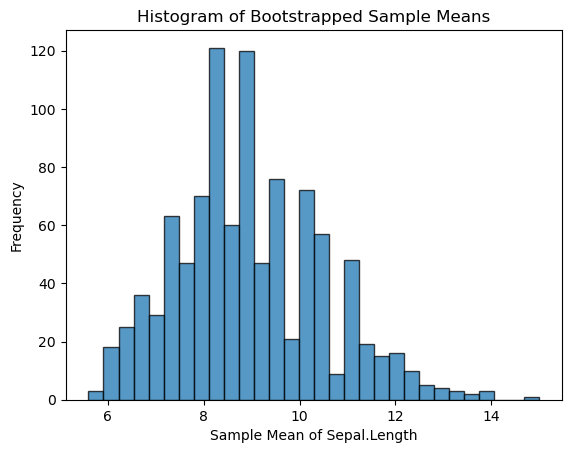

In [73]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
plt.hist(bootstrap_means, bins=30, alpha=0.75, edgecolor='black')
# Add a title
#Add your code here
plt.title('Histogram of Bootstrapped Sample Means')

# Add a label to the x-axis
#Add your code here
plt.xlabel('Sample Mean of Sepal.Length')

# Add a label to the y-axis
#Add your code here
plt.ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here

Based on the current analysis, the shipping company can confidently use the original mean (5.8433) or the bootstrapped mean as a basis for space allocation. However, awareness of the variability through bootstrapping helps in making informed decisions and managing risk effectively.
By considering these recommendations, the shipping company can optimize space allocation while accounting for the variability and uncertainty in the data regarding the length of iris sepals.





# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
